# PCA plot

In [1]:
import numpy as np
import pandas as pd 
import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Importation of the dataset
 
#df = pd.read_pickle("./All_sentences.pkl")
df = pd.read_pickle("./Episode_1.pkl")

target_names = {'Chandler': 0, 'Rachel': 1, 'Joey': 2, 'Ross': 3,'Phoebe': 4, 'Monica': 5 }
df['Target'] = df['Person'].map(target_names)

#print(df)

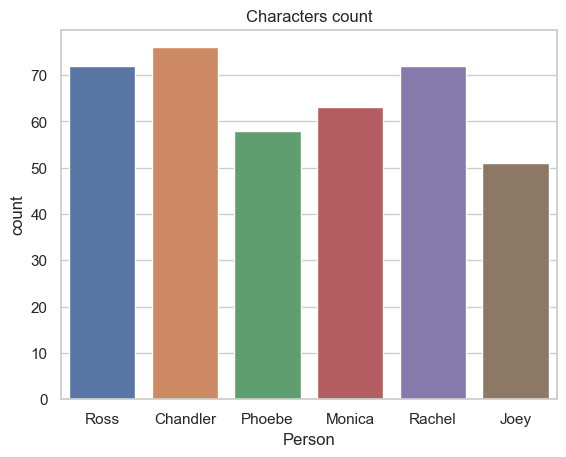

In [22]:
sns.countplot(x='Person', data=df)
plt.title('Characters count')
plt.show()

In [23]:
X = np.stack(df['Embedding'])
y = df['Person']
x_scaled = sklearn.preprocessing.StandardScaler().fit_transform(X)

In [25]:
nb_components = 20
pca = PCA(n_components=nb_components)
 
pca_features = pca.fit_transform(x_scaled)
 
print('Shape before PCA: ', x_scaled.shape)
print('Shape after PCA: ', pca_features.shape)

 
pca_df = pd.DataFrame(
    data=pca_features, 
    columns=[f'PC{i}' for i in range(1, nb_components+1)])  

Shape before PCA:  (392, 384)
Shape after PCA:  (392, 20)


In [26]:
pca_df['target'] = y
pca_df['target'] = df['Person']
print(pca_df.shape)
pca_df

(392, 21)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,target
0,-1.871856,8.037605,0.788505,1.532050,2.746762,0.109615,1.477611,7.728333,-1.878667,2.131501,...,2.280950,-0.035238,-2.304845,2.139627,0.753953,0.995091,1.226731,-2.303110,-2.656318,Ross
1,0.075259,7.942778,-5.573887,0.690191,0.888246,1.282543,1.425241,1.836391,2.489793,-0.630946,...,7.588996,2.694357,-2.708362,-3.004711,-2.340902,0.442936,2.407518,-0.847904,-0.593039,Ross
2,-3.791565,-1.753792,-2.319320,0.404161,-2.214392,0.332503,-1.740350,0.760194,-2.304930,6.042320,...,-0.475794,-2.254740,4.941784,-5.733217,0.974345,7.334501,-0.760865,0.847602,0.309284,Chandler
3,-3.724788,-1.702973,-2.395563,0.514244,-1.154685,-0.142233,-0.969486,0.121425,-2.511483,4.046511,...,0.857858,-1.229096,3.532543,-4.435689,0.615117,9.898363,-0.653546,-1.025503,0.768035,Chandler
4,5.250334,2.066943,6.085964,-6.976933,0.491304,2.099459,-5.449815,-1.158281,-1.320436,-3.369297,...,1.204008,-1.789327,-1.243152,-1.525674,1.510612,2.407992,1.843388,-0.895939,-1.546759,Chandler
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,-4.568052,1.234491,-1.269627,-1.538609,-1.377782,-0.690497,-1.209017,-1.241242,-3.473992,-0.014884,...,1.361740,-0.321463,-1.901923,-1.318481,1.401492,2.395981,0.524320,0.095868,-0.273554,Chandler
388,-0.740059,-2.829561,-2.736864,-2.893935,7.014018,0.149360,-1.793903,0.264172,1.088090,-0.571616,...,0.928976,3.271580,0.686794,0.770608,0.610317,-0.012980,1.521025,0.283450,4.634124,Chandler
389,-5.119713,-4.526159,2.901326,1.948695,1.304928,-1.754949,-0.847220,1.231839,-0.365060,-2.861174,...,0.729614,-0.302068,-6.777210,1.289044,-0.726897,-1.432013,0.943653,-0.952895,2.008519,Ross
390,-9.311006,-2.614332,7.168315,0.626711,1.727358,-5.668576,0.611841,-1.691621,0.993339,-4.576195,...,0.490399,1.551293,-2.997067,0.492447,0.431730,2.934933,-1.212804,-0.509042,0.218879,Chandler


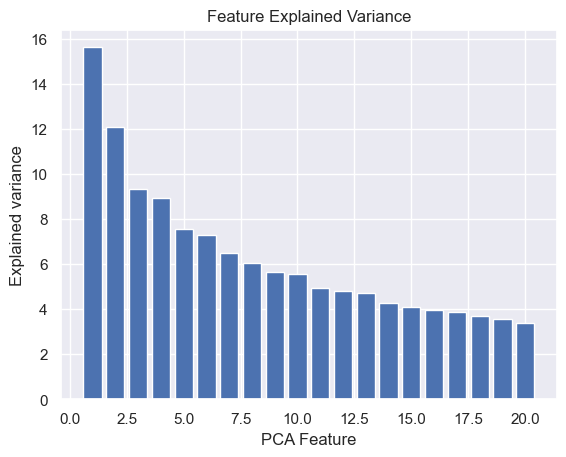

In [18]:
pca.explained_variance_
sns.set()

# Bar plot of explained_variance
plt.figure()
plt.bar(range(1,len(pca.explained_variance_)+1),pca.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Explained variance')
plt.title('Feature Explained Variance')
plt.show()

In [19]:
# Principal components correlation coefficients
loadings = pca_features.T
# Number of features before PCA
n_features = pca.n_features_
 
# Feature names before PCA
feature_names = df['Said']
# PC names
pc_list = [f'PC{i}' for i in list(range(1, n_features + 1))]
 
# Match PC names to loadings
pc_loadings = dict(zip(pc_list, loadings))
 
# Matrix of corr coefs between feature names and PCs
loadings_df = pd.DataFrame.from_dict(pc_loadings)
loadings_df['feature_names'] = feature_names
loadings_df = loadings_df.set_index('feature_names')
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20
feature_names,,,,,,,,,,,,,,,,,,,,
Y'know what?,1.423187,-2.346542,-4.338385,0.780491,1.035807,-3.016273,-2.443516,-0.956639,-3.004154,-0.058536,2.536169,0.372655,-3.363707,-0.849117,-2.905357,-3.710533,-0.015180,-0.329107,-0.107884,2.199408
It seems like all of the sudden; so much has happened.,-1.934626,-2.934299,-2.124745,0.669921,0.279165,-2.211007,-1.196165,1.683753,-0.105885,-4.981338,1.228797,6.267918,1.406042,-1.663689,3.346539,1.208459,0.984430,0.988697,3.743963,-0.698332
I know.,4.934336,-5.525266,-2.797174,1.090472,3.678059,-0.742407,1.063463,1.549716,0.887098,-3.894754,-1.841807,-5.377609,-2.776101,2.198064,3.248042,-1.112563,3.819438,1.846699,1.933280,3.262547
Ross is getting married.,-6.677275,0.596350,-2.736831,5.006828,-3.535669,2.272392,3.562360,-2.425939,-0.718357,-3.628037,-1.550938,0.960261,0.727847,2.995427,-4.586210,2.604500,-0.045261,-1.169003,3.661244,-2.145265
"Phoebe is, making people.",-4.724403,2.556597,-4.397851,6.795931,-2.917938,3.418870,4.121833,-0.525052,-0.379611,-0.757768,2.800268,1.515315,-2.560899,-0.821364,0.249121,-4.506300,0.502063,2.286273,0.704633,-1.575214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Hello, Jennifer?",-0.357808,3.138608,0.488671,6.415590,0.794701,-0.851835,-4.041006,-3.801665,-0.167875,5.177060,2.356645,1.186437,0.403657,-1.082198,0.420791,0.269469,-1.056599,0.036575,1.523853,0.200296
"Oh hi, Mrs. Loreo, is Jennifer there?",-3.182346,1.788399,-0.905621,4.465011,0.262612,1.987807,0.084736,-1.804948,3.412277,3.206514,2.258265,4.896667,-0.267945,-0.236079,0.123905,1.822363,0.242594,0.436114,1.242785,0.949723
"Oh, she's not home huh?",-2.807842,0.358281,-1.926011,2.052517,3.275446,1.975891,1.866607,-1.788578,3.429483,4.850846,0.494171,7.067808,-0.990934,1.663039,2.658865,-1.213950,-0.047552,1.718886,-0.111374,3.026727


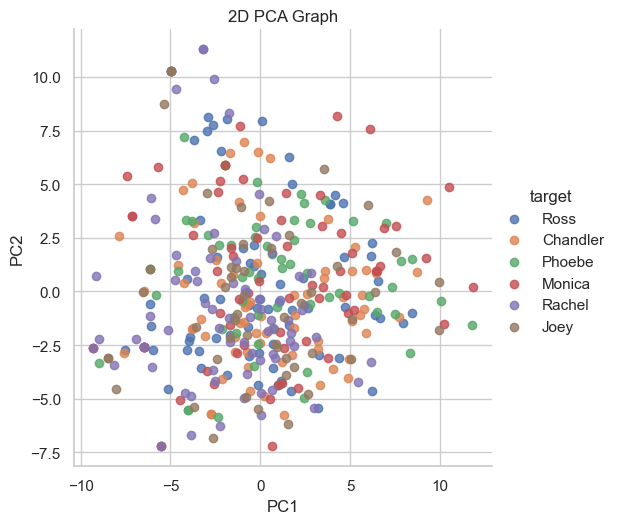

In [27]:
sns.set()
sns.set_style("whitegrid")
sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=pca_df, 
    hue='target', 
    fit_reg=False, 
    legend=True
    )
sns.despine()

plt.title('2D PCA Graph')
plt.show()


In [11]:
# TO DO: modify the plot
'''# Get the loadings of x and y axes
xs = loadings[0]
ys = loadings[1]
 
# Plot the loadings on a scatterplot
for i, varname in enumerate(feature_names):
    plt.scatter(xs[i], ys[i], s=200)
    plt.text(xs[i], ys[i],varname)
 
# Define the axes
xticks = np.linspace(-0.8, 0.8, num=5)
yticks = np.linspace(-0.8, 0.8, num=5)
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('PC1')
plt.ylabel('PC2')
 
# Show plot
plt.title('2D Loading plot')
plt.show()
'''

"# Get the loadings of x and y axes\nxs = loadings[0]\nys = loadings[1]\n \n# Plot the loadings on a scatterplot\nfor i, varname in enumerate(feature_names):\n    plt.scatter(xs[i], ys[i], s=200)\n    plt.text(xs[i], ys[i],varname)\n \n# Define the axes\nxticks = np.linspace(-0.8, 0.8, num=5)\nyticks = np.linspace(-0.8, 0.8, num=5)\nplt.xticks(xticks)\nplt.yticks(yticks)\nplt.xlabel('PC1')\nplt.ylabel('PC2')\n \n# Show plot\nplt.title('2D Loading plot')\nplt.show()\n"

Ref https://www.jcchouinard.com/pca-with-python/